### Compare HL Tau to COUP

This notebook reads in data from two-temperature fits to sources observed in the Chandra Orion Ultradeep Project (COUP), published in Getman et al. (2005). The nootebook sets relevant distances, builds a table in a useful format, and then generates a figure based on it, with space for editing to finalize formatting.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from astropy import units as u
import matplotlib as mlp
from astropy.constants import h, k_B, c
from generate_COUP_table import generate_COUP_table
from matplotlib.ticker import ScalarFormatter

In [2]:
distancePcTaurus = 140. * u.pc
distanceCMTaurus = distancePcTaurus.to(u.cm).value

distancePcOrion = 450. * u.pc
distanceCMOrion = distancePcOrion.to(u.cm).value

In [3]:
tableCOUPModelsUse = generate_COUP_table('hltau_tables/COUP_Getman2005_table6.txt','hltau_tables/COUP_Getman2005_table8.txt')
tableCOUPModelsUse

/media/steven/data594/miniconda3/envs/ciao-4.16/lib/python3.11/site-packages/astropy/table/column.py:1376: UserWarning: Warning: converting a masked element to nan.
  self.data[index] = value
/home/steven/Github/hltau_scripts_notebooks/generate_COUP_table.py:49: RuntimeWarning: divide by zero encountered in log10
  tableCOUPModels['EMRatio'][i] = np.log10(tableCOUPModels['EMRatio'][i])
/home/steven/Github/hltau_scripts_notebooks/generate_COUP_table.py:51: RuntimeWarning: divide by zero encountered in log10
  tableCOUPModels['LogkT2'][i]  = np.log10(tableCOUPModels['kT2'][i])
/media/steven/data594/miniconda3/envs/ciao-4.16/lib/python3.11/site-packages/astropy/table/column.py:1376: UserWarning: Warning: converting a masked element to nan.
  self.data[index] = value
/home/steven/Github/hltau_scripts_notebooks/generate_COUP_table.py:50: RuntimeWarning: divide by zero encountered in log10
  tableCOUPModels['LogkT1'][i]  = np.log10(tableCOUPModels['kT1'][i])


Seq,CXOONCJ,NH,e_NH,kT1,e_kT1,kT2,e_kT2,EM1,e_EM1,EM2,e_EM2,ChiSq,d_ChiSq,FitFl,ModFl,SpeFl,LogLum,FluxAbs,FluxUnabs,LogFluxUnabs,EMRatio,LogEMRatio,LogkT1,LogkT2
,,dex(1 / cm2),dex(1 / cm2),keV,keV,keV,keV,dex(1 / cm3),dex(1 / cm3),dex(1 / cm3),dex(1 / cm3),,,,,,,,,,,,,
int64,str16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str1,str7,str9,float64,float64,float64,float64,float64,float64,float64,float64
1,053429.4-052337,20.67,0.43,0.85,0.12,4.37,0.95,52.17,0.11,52.62,0.04,1.15,33,--,20.1.2,000c00000,29.84,2.66479630801311e-14,2.66479630801311e-14,-13.574335982017061,-inf,0.0,-0.07058107428570727,0.6404814369704218
2,053429.5-052354,21.21,0.07,0.79,0.03,3.29,0.35,53.13,0.06,53.16,0.04,1.15,23,--,60.1.2,000000000,30.47,9.02950656271567e-14,9.02950656271567e-14,-13.04433598201706,-inf,0.0,-0.10237290870955855,0.5171958979499743
6,053438.2-052423,21.12,0.12,0.78,0.09,2.32,0.27,52.16,0.12,52.68,0.04,1.15,28,--,60.1.2,000c00000,29.79,2.021454721279319e-14,2.021454721279319e-14,-13.694335982017058,-inf,0.0,-0.10790539730951959,0.3654879848908996
14,053441.6-052357,20.81,0.14,0.69,6.24,9.23,15.0,51.64,1.0,51.19,0.21,0.75,25,--,10.1.2,00hc00000,28.82,2.375002209452041e-15,2.375002209452041e-15,-14.624335982017058,-inf,0.0,-0.16115090926274472,0.9652017010259121
21,053444.5-052438,20.79,2.06,0.68,0.11,1.77,0.47,51.63,0.17,51.89,0.12,0.92,42,--,10.1.2,00h000000,29.04,3.941522571941877e-15,3.941522571941877e-15,-14.40433598201706,-inf,0.0,-0.16749108729376366,0.24797326636180664
23,053445.2-052504,21.24,0.01,0.85,0.01,2.47,0.04,53.74,0.02,54.14,0.01,1.94,214,--,60.1.2g,0000000w0,31.29,6.104695663242263e-13,6.104695663242263e-13,-12.214335982017058,-inf,0.0,-0.07058107428570727,0.39269695325966575
27,053445.9-052455,21.08,0.05,0.83,0.03,2.87,0.12,52.74,0.03,53.09,0.02,1.29,70,--,60.1.2g,l00c00000,30.27,6.392401106143487e-14,6.392401106143487e-14,-13.194335982017058,-inf,0.0,-0.0809219076239261,0.4578818967339924
29,053446.5-052325,21.59,0.03,0.81,0.06,3.13,0.32,52.56,0.13,52.82,0.03,1.21,28,--,60.1.2,000000000,30.04,2.7268673878454513e-14,2.7268673878454513e-14,-13.56433598201706,-inf,0.0,-0.09151498112135022,0.49554433754644844


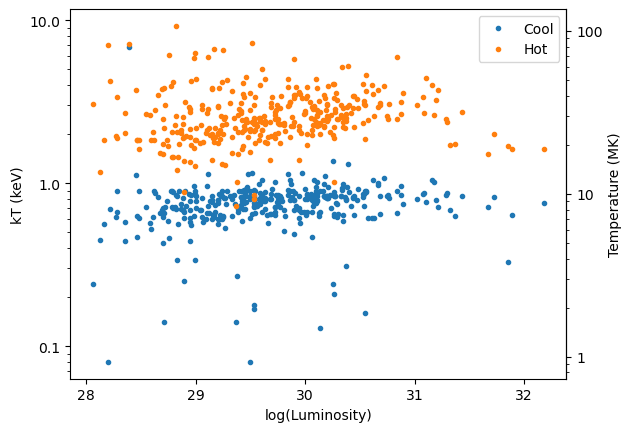

In [4]:
fig, ax = plt.subplots()

ax.plot(tableCOUPModelsUse['LogLum'],10.**tableCOUPModelsUse['LogkT1'],'.',label='Cool')
ax.plot(tableCOUPModelsUse['LogLum'],10.**tableCOUPModelsUse['LogkT2'],'.',label='Hot')
ax.set_xlabel(r'log(Luminosity)')
ax.set_ylabel(r'kT (keV)')
ax.legend(loc='best')
ax.set_yscale('log')

def kT2MK(y):
    return ((y * u.keV) / k_B).to(u.K).value/1.0e6

def MK2kT(y):
    return ((y * 1.0e6 * u.K) * k_B).to(u.keV).value


secax = ax.secondary_yaxis('right', functions=(kT2MK, MK2kT))
secax.set_ylabel('Temperature (MK)')

for axis in [ax.xaxis, ax.yaxis,secax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())

plt.show()

In [6]:
#read in data from fitting HL Tau spectra, with LX information, for comparison plotting.
tableFitResults = Table.read('hltau_tables/tableFitResultsFittedFe_20240214_with_LXdata.ecsv')
tableFitResults.show_in_notebook()

         interactive tables it is recommended to use dedicated tools like:
         - https://github.com/bloomberg/ipydatagrid
         - https://docs.bokeh.org/en/latest/docs/user_guide/interaction/widgets.html#datatable
         - https://dash.plotly.com/datatable [warnings]


idx,Source,rstat,a1.nH,a1.nH-,a1.nH+,s1.kT,s1.kT-,s1.kT+,s1.norm,s1.norm-,s1.norm+,FluxAbs,FluxAbsLow,FluxAbsHigh,FluxUnabs,FluxUnabsLow,FluxUnabsHigh,StartTime,EndTime,CentralTime,Duration,s1.EM,s1.EM-,s1.EM+,s1.EM52,s1.EM52-,s1.EM52+,LXUnabs,FluxAbsUnc,FluxUnabsUnc,a1.NHUnc,s1.EM52Unc
0,FaintXMM,0.4486198442149156,3.0421817661533477,-0.1452997241496985,0.15416777445115004,3.878691206483214,-0.2743520601116489,0.3116625102471571,0.0007014522082626699,-4.630723793671719e-05,5.0829811308168065e-05,4.2234628682233273e-13,-1.2665796888444091e-14,8.354193618583505e-15,1.019371927304893e-12,-4.606448455108019e-14,4.151938106383312e-14,0.0,0.0,0.0,0.0,1.6449970088626968e+53,-1.085965187610728e+52,1.1920254377712476e+52,16.44997008862697,-1.0859651876107281,1.1920254377712476,30.378499695114332,1.2665796888444091e-14,4.606448455108019e-14,0.15416777445115004,1.1920254377712476
1,109060301,0.41028484043986946,2.3006170250936115,-0.1690342073720985,0.19655484542286938,2.6811438658436137,-0.26033056733753224,0.27164117766462503,0.0006266834725075747,-6.275504492852266e-05,7.709905519789927e-05,3.0716337870616663e-13,-1.849941143665648e-14,1.0158284601298317e-14,8.107573606673464e-13,-8.073139958143106e-14,6.910112204118436e-14,51796.78078770721,51797.42965143517,51797.105219571196,0.6488637279617251,1.4696545618295555e+53,-1.4716877355642608e+52,1.808073503693235e+52,14.696545618295556,-1.4716877355642608,1.808073503693235,30.279057926038906,1.849941143665648e-14,8.073139958143106e-14,0.19655484542286938,1.808073503693235
2,200810201,0.3320662229852115,2.364702893028361,-0.515061915690616,0.616135634882987,3.8294910958116954,-1.0097895516740372,1.9789362101408656,0.0007063131881788251,-0.00017933374978176917,0.00024595133095276184,4.600595868664475e-13,-2.14864327370471e-13,2.1690380787927488e-13,1.0224802450069898e-12,-4.011244179606474e-13,4.044295685869086e-13,53068.67472168215,53068.76878474769,53068.72175321492,0.09406306553864852,1.6563966414079015e+53,-4.2056105676792286e+52,5.76787982099541e+52,16.563966414079015,-4.205610567679229,5.76787982099541,30.37982195172733,2.1690380787927488e-13,4.044295685869086e-13,0.616135634882987,5.76787982099541
3,200810301,0.4247276114340336,2.3255441762791924,-0.4623064942987454,0.5719467079117124,3.005067108651871,-0.6740645746311595,1.03098575778154,0.0004470928258907251,-0.00011308939433057809,0.00015491329976932147,2.416622401863559e-13,-5.3855390595594925e-14,2.3960223751758767e-14,5.994188674126651e-13,-1.2847476439165612e-13,1.2334101341208753e-13,53069.1437027927,53069.2481896209,53069.195946206804,0.10448682819696842,1.0484910484433263e+53,-2.6520939447699685e+52,3.632919131935475e+52,10.484910484433264,-2.6520939447699687,3.6329191319354748,30.147897434576368,5.3855390595594925e-14,1.2847476439165612e-13,0.5719467079117124,3.6329191319354748
4,200810401,0.3518252130925782,2.799432263284305,-0.44258571990408235,0.5401366934366436,2.94816506310796,-0.6354532893626907,0.9776601331141257,0.0007215314651957659,-0.0001718670830501474,0.0002304622932140872,3.565860749752105e-13,-1.3233274107425663e-13,1.149592045483378e-13,9.614922994044333e-13,-2.3857572032504895e-13,2.63837588743614e-13,53069.70742574238,53069.80149908597,53069.754462414174,0.09407334358547814,1.6920854878867155e+53,-4.030507484461149e+52,5.404641663781712e+52,16.920854878867154,-4.030507484461149,5.404641663781712,30.35311283614508,1.3233274107425663e-13,2.63837588743614e-13,0.5401366934366436,5.404641663781712
5,200810501,0.30907507881730495,2.354167894833733,-0.4855232285569333,0.5632058933889676,3.230219678167764,-0.8295263343879333,1.7612060977832056,0.0005760289476383414,-0.00015795913527676586,0.0002027745777090353,3.2950851127751367e-13,-2.017818835022965e-13,1.2660788334964732e-14,7.903786342650141e-13,-3.844444128722237e-13,2.1692897776384305e-13,53070.03425610426,53070.159926566856,53070.097091335556,0.12567046259209746,1.350863087636852e+53,-3.7043479511795306e+52,4.7553285865464306e+52,13.508630876368521,-3.70

In [9]:
#shift data into useful format for this plot
tableFitResults['LogkT1'] = 0.

for i in range(len(tableFitResults['Source'])):
    tableFitResults['LogkT1'][i] = np.log10(tableFitResults['s1.kT'][i])

In [10]:
#Select rows of table to use in the plot
tableFitResultsUse = tableFitResults[1:12]

for i in range(13,25):
    tableFitResultsUse.add_row(tableFitResults[i])

for i in range(29,32):
    tableFitResultsUse.add_row(tableFitResults[i])

tableFitResultsUse

Source,rstat,a1.nH,a1.nH-,a1.nH+,s1.kT,s1.kT-,s1.kT+,s1.norm,s1.norm-,s1.norm+,FluxAbs,FluxAbsLow,FluxAbsHigh,FluxUnabs,FluxUnabsLow,FluxUnabsHigh,StartTime,EndTime,CentralTime,Duration,s1.EM,s1.EM-,s1.EM+,s1.EM52,s1.EM52-,s1.EM52+,LXUnabs,FluxAbsUnc,FluxUnabsUnc,a1.NHUnc,s1.EM52Unc,LogkT1
str9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
109060301,0.41028484043986946,2.3006170250936115,-0.1690342073720985,0.19655484542286938,2.6811438658436137,-0.26033056733753224,0.27164117766462503,0.0006266834725075747,-6.275504492852266e-05,7.709905519789927e-05,3.0716337870616663e-13,-1.849941143665648e-14,1.0158284601298317e-14,8.107573606673464e-13,-8.073139958143106e-14,6.910112204118436e-14,51796.78078770721,51797.42965143517,51797.105219571196,0.6488637279617251,1.4696545618295555e+53,-1.4716877355642608e+52,1.808073503693235e+52,14.696545618295556,-1.4716877355642608,1.808073503693235,30.279057926038906,1.849941143665648e-14,8.073139958143106e-14,0.19655484542286938,1.808073503693235,0.4283201181476294
200810201,0.3320662229852115,2.364702893028361,-0.515061915690616,0.616135634882987,3.8294910958116954,-1.0097895516740372,1.9789362101408656,0.0007063131881788251,-0.00017933374978176917,0.00024595133095276184,4.600595868664475e-13,-2.14864327370471e-13,2.1690380787927488e-13,1.0224802450069898e-12,-4.011244179606474e-13,4.044295685869086e-13,53068.67472168215,53068.76878474769,53068.72175321492,0.09406306553864852,1.6563966414079015e+53,-4.2056105676792286e+52,5.76787982099541e+52,16.563966414079015,-4.205610567679229,5.76787982099541,30.37982195172733,2.1690380787927488e-13,4.044295685869086e-13,0.616135634882987,5.76787982099541,0.5831410640559513
200810301,0.4247276114340336,2.3255441762791924,-0.4623064942987454,0.5719467079117124,3.005067108651871,-0.6740645746311595,1.03098575778154,0.0004470928258907251,-0.00011308939433057809,0.00015491329976932147,2.416622401863559e-13,-5.3855390595594925e-14,2.3960223751758767e-14,5.994188674126651e-13,-1.2847476439165612e-13,1.2334101341208753e-13,53069.1437027927,53069.2481896209,53069.195946206804,0.10448682819696842,1.0484910484433263e+53,-2.6520939447699685e+52,3.632919131935475e+52,10.484910484433264,-2.6520939447699687,3.6329191319354748,30.147897434576368,5.3855390595594925e-14,1.2847476439165612e-13,0.5719467079117124,3.6329191319354748,0.4778541750381804
200810401,0.3518252130925782,2.799432263284305,-0.44258571990408235,0.5401366934366436,2.94816506310796,-0.6354532893626907,0.9776601331141257,0.0007215314651957659,-0.0001718670830501474,0.0002304622932140872,3.565860749752105e-13,-1.3233274107425663e-13,1.149592045483378e-13,9.614922994044333e-13,-2.3857572032504895e-13,2.63837588743614e-13,53069.70742574238,53069.80149908597,53069.754462414174,0.09407334358547814,1.6920854878867155e+53,-4.030507484461149e+52,5.404641663781712e+52,16.920854878867154,-4.030507484461149,5.404641663781712,30.35311283614508,1.3233274107425663e-13,2.63837588743614e-13,0.5401366934366436,5.404641663781712,0.4695517953302033
200810501,0.30907507881730495,2.354167894833733,-0.4855232285569333,0.5632058933889676,3.230219678167764,-0.8295263343879333,1.7612060977832056,0.0005760289476383414,-0.00015795913527676586,0.0002027745777090353,3.2950851127751367e-13,-2.017818835022965e-13,1.2660788334964732e-14,7.903786342650141e-13,-3.844444128722237e-13,2.1692897776384305e-13,53070.03425610426,53070.159926566856,53070.097091335556,0.12567046259209746,1.350863087636852e+53,-3.7043479511795306e+52,4.7553285865464306e+52,13.508630876368521,-3.7043479511795305,4.7553285865464305,30.268002217591917,2.017818835022965e-13,3.844444128722237e-13,0.5632058933889676,4.7553285865464305,0.5092320584833838
200810601,0.3497605435405219,2.3754929623683934,-0.4512500983695684,0.5602208192645217,2.8259065704136956,-0.60

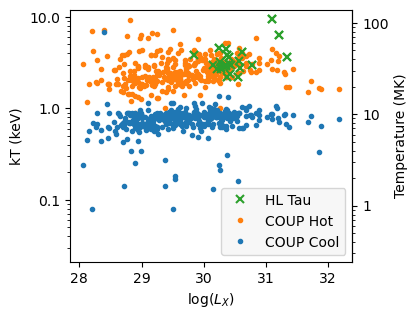

In [11]:
#Generate plot
fig, ax = plt.subplots(figsize=(4.,3.))

ax.plot(tableFitResultsUse['LXUnabs'],10.**tableFitResultsUse['LogkT1'],'x',color='C2',mew=1.5,label='HL Tau')
ax.plot(tableCOUPModelsUse['LogLum'], 10.**tableCOUPModelsUse['LogkT2'],'.',color='C1',label='COUP Hot')
ax.plot(tableCOUPModelsUse['LogLum'], 10.**tableCOUPModelsUse['LogkT1'],'.',color='C0',label='COUP Cool')
ax.plot(tableFitResultsUse['LXUnabs'],10.**tableFitResultsUse['LogkT1'],'x',color='C2',mew=1.5)
ax.set_xlabel(r'log($L_{X}$)')
ax.set_ylabel(r'kT (keV)')
ax.set_yscale('log')
ax.set_ylim(0.021,12.)
#ax.set_xlim(27.9,33.5)
ax.legend(loc='lower right',ncols=1,facecolor='whitesmoke')

secax = ax.secondary_yaxis('right', functions=(kT2MK, MK2kT))
secax.set_ylabel('Temperature (MK)')

for axis in [ax.xaxis, ax.yaxis,secax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())

plt.tight_layout()
plt.subplots_adjust(left=0.155,top=0.99,bottom=0.15,right=0.86)
plt.savefig('hltau_local_plots/HLTau_oneT_vs_COUP_with_MK_20240813.png')
plt.savefig('hltau_local_plots/HLTau_oneT_vs_COUP_with_MK_20240813.pdf')